In [564]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [568]:
df = pd.read_csv("diabetes.csv")

In [570]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [572]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [574]:
X = df.drop('Outcome',axis=1)

In [576]:
y = df['Outcome']

In [578]:
X.shape , y.shape

((768, 8), (768,))

In [580]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [582]:
X_trans = scaler.fit_transform(X)

In [584]:
X_trans.shape

(768, 8)

In [586]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_trans,y,test_size=0.2,random_state=1)

In [587]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [589]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [590]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [591]:
history = model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4004 - loss: 0.9302 - val_accuracy: 0.7208 - val_loss: 0.5907
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7192 - loss: 0.5931 - val_accuracy: 0.8182 - val_loss: 0.5057
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7534 - loss: 0.5202 - val_accuracy: 0.8247 - val_loss: 0.4887
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7577 - loss: 0.5151 - val_accuracy: 0.8052 - val_loss: 0.4857
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7577 - loss: 0.4917 - val_accuracy: 0.8052 - val_loss: 0.4883
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7612 - loss: 0.4914 - val_accuracy: 0.7987 - val_loss: 0.4846
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7676 - loss: 0.4693 - val_accuracy: 0.7922 - val_loss: 0.4853
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7866 - loss: 0.4648 - val_accuracy: 0.8117 - val_loss

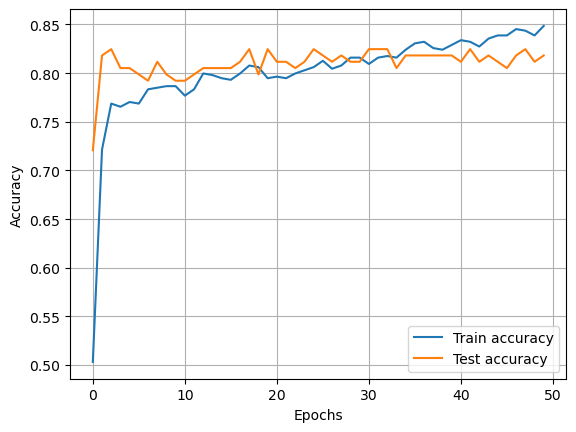

In [592]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

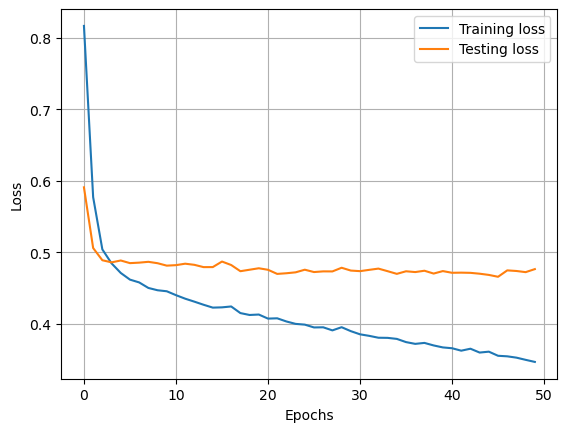

In [593]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Use keras Tuner for Hyperparameter tuning

In [595]:
# 1 . How to select appropiate optimizer
# 2 . No of nodes in a layer
# 3 . How to select no. of layers
# 4 . All in one model

In [597]:
import keras_tuner as kt

# 1 . How to select appropiate optimizer

In [601]:
def build_model(hp):

    model = Sequential()
    model.add(Input(shape=(8,)))
    model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(1,activation='sigmoid'))

    # select best optimizers from the list 
    optimizers_list = hp.Choice('optimizers',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers_list,loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [602]:
# tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [603]:
# tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

In [604]:
# More Advance code from GPT
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Assuming build_model(hp) is already defined

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,            # how many different hyperparameter combinations to try
    executions_per_trial=1,   # number of times to train each model for robustness
    directory='my_tuner_dir',
    project_name='my_model_tuning'
)

# Optional: Stop training early if no improvement
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Start searching
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Trial 4 Complete [00h 00m 05s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 21s


In [605]:
tuner.get_best_hyperparameters()[0].values

{'optimizers': 'adam'}

In [606]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [607]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [608]:
model.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7317 - loss: 0.5223 - val_accuracy: 0.7857 - val_loss: 0.5193
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7391 - loss: 0.5096 - val_accuracy: 0.7922 - val_loss: 0.5122
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7498 - loss: 0.5093 - val_accuracy: 0.7857 - val_loss: 0.5070
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 - loss: 0.5267 - val_accuracy: 0.7857 - val_loss: 0.5012
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7627 - loss: 0.4743 - val_accuracy: 0.7792 - val_loss: 0.4974
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7094 - loss: 0.5281 - val_accuracy: 0.7857 - val_loss: 0.4937
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7515 - loss: 0.4847 - val_accuracy: 0.7922 - val_loss: 0.4919
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7451 - loss: 0.5018 - val_accuracy: 0

# 2 . No of nodes in a layer


In [610]:
def build_model(hp):
    
    model = Sequential()

    units = hp.Int('units',min_value=8,max_value=128,step=8)

    model.add(Dense(units=units,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    return model

In [611]:
tuner = kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=10,
                       max_retries_per_trial=1,
                       directory='my_tuner_dir',
                       project_name='my_model_tuning_nodes')

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [612]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 52s


In [613]:
tuner.get_best_hyperparameters()[0].values

{'units': 48}

In [614]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [615]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [616]:
model.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7503 - loss: 0.5481 - val_accuracy: 0.8117 - val_loss: 0.5192
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7562 - loss: 0.5320 - val_accuracy: 0.8052 - val_loss: 0.5001
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.4962 - val_accuracy: 0.7922 - val_loss: 0.4856
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7679 - loss: 0.4950 - val_accuracy: 0.7987 - val_loss: 0.4752
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7764 - loss: 0.4859 - val_accuracy: 0.7987 - val_loss: 0.4696
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7770 - loss: 0.4818 - val_accuracy: 0.7987 - val_loss: 0.4657
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7796 - loss: 0.4555 - val_accuracy: 0.8052 - val_loss: 0.4626
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7697 - loss: 0.4874 - val_accuracy: 0

# 3 . How to select no. of layers

In [618]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72,activation='relu',input_dim=8))

    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))

    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [619]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    max_retries_per_trial=1,
    directory='my_tuner_dir',
    project_name='my_model_tuning_layers'
)

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [620]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.8246753215789795

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 00m 34s


In [621]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6}

In [622]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [623]:
model.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7923 - loss: 0.4611 - val_accuracy: 0.7922 - val_loss: 0.4687
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8151 - loss: 0.3852 - val_accuracy: 0.7922 - val_loss: 0.4842
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8252 - loss: 0.4041 - val_accuracy: 0.8117 - val_loss: 0.4732
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8288 - loss: 0.3877 - val_accuracy: 0.7987 - val_loss: 0.4827
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8192 - loss: 0.3802 - val_accuracy: 0.8052 - val_loss: 0.4906
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8326 - loss: 0.3898 - val_accuracy: 0.8117 - val_loss: 0.4923
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8353 - loss: 0.3612 - val_accuracy: 0.7857 - val_loss: 0.5115
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8494 - loss: 0.3487 - val_accuracy: 0

# 4 . All in one model

In [625]:
def build_model(hp):
    model = Sequential()

    counter = 0
    #for finding optimal layers
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        #if it is first layer
        if counter == 0:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,steps=8),# for optimal node in every layers
                    activation = hp.Choice('activation'+str(i),values=['relu','tanh','selu']),#optimal activation
                    input_dim=8
                )
            )
        else:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,steps=8),# for optimal node in every layers
                    activation = hp.Choice('activation'+str(i),values=['relu','tanh','selu']),#optimal activation
                )
            )
        counter+=1

    model.add(Dense(1,activation='sigmoid'))

    #optimal optimizer
    optimizers_list = hp.Choice('optimizers',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers_list,loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [626]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(8,)))
    #for finding optimal layers
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        #find optimal layers
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,step=8),# for optimal node in every layers
                    activation = hp.Choice('activation'+str(i),values=['relu','tanh','selu']),#optimal activation
                )
            )
        #find optimal dropout layer value
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
    model.add(Dense(1,activation='sigmoid'))

    #optimal optimizer
    optimizers_list = hp.Choice('optimizers',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers_list,loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [627]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=10,
    max_retries_per_trial=1,
    directory='my_tuner_dir_main',
    project_name='my_model_tuning'
)

In [628]:
tuner.search(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Trial 10 Complete [00h 00m 18s]
val_accuracy: 0.8246753215789795

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 02m 57s


In [629]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 128,
 'activation0': 'relu',
 'dropout0': 0.2,
 'optimizers': 'adam',
 'units1': 32,
 'activation1': 'relu',
 'dropout1': 0.3,
 'units2': 96,
 'activation2': 'relu',
 'dropout2': 0.2,
 'units3': 32,
 'activation3': 'selu',
 'dropout3': 0.4,
 'units4': 16,
 'activation4': 'relu',
 'dropout4': 0.3,
 'units5': 48,
 'activation5': 'tanh',
 'dropout5': 0.9,
 'units6': 128,
 'activation6': 'tanh',
 'dropout6': 0.8,
 'units7': 80,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 104,
 'activation8': 'relu',
 'dropout8': 0.4}

In [630]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [631]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [632]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(
#     monitor='val_accuracy',     # or 'val_accuracy'
#     patience=40,             # how many epochs to wait after no improvement
#     restore_best_weights=True  # revert to best weights after training
# )

from tensorflow.keras.callbacks import Callback
import numpy as np

class AccuracyGapEarlyStopping(Callback):
    def __init__(self, threshold=0.01, patience=5):
        super().__init__()
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        gap = abs(acc - val_acc)

        if gap < self.threshold:
            self.wait += 1
            print(f"Accuracy gap {gap:.4f} is below threshold. Patience count: {self.wait}/{self.patience}")
            if self.wait >= self.patience:
                print("Stopping training early due to small accuracy gap.")
                self.model.stop_training = True
        else:
            self.wait = 0  # reset if gap grows


In [633]:
gap_stop = AccuracyGapEarlyStopping(threshold=0.03, patience=10)

In [634]:
history = model.fit(X_train,y_train,epochs=200,initial_epoch=10,validation_data=(X_test,y_test), callbacks=[gap_stop])

Epoch 11/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 17s 947ms/step - accuracy: 0.7812 - loss: 0.5384Accuracy gap 0.0267 is below threshold. Patience count: 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7934 - loss: 0.4350 - val_accuracy: 0.8117 - val_loss: 0.4537
Epoch 12/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.7188 - loss: 0.5277Accuracy gap 0.0266 is below threshold. Patience count: 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8039 - loss: 0.4170 - val_accuracy: 0.8247 - val_loss: 0.4557
Epoch 13/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8125 - loss: 0.6280Accuracy gap 0.0250 is below threshold. Patience count: 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7963 - loss: 0.4572 - val_accuracy: 0.8247 - val_loss: 0.4562
Epoch 14/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.7500 - loss: 0.5603Accuracy gap 0.0202 is below threshold. Patience count: 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7851 - lo

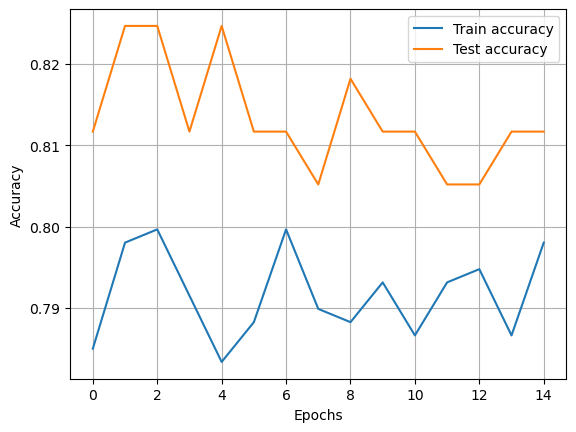

In [635]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

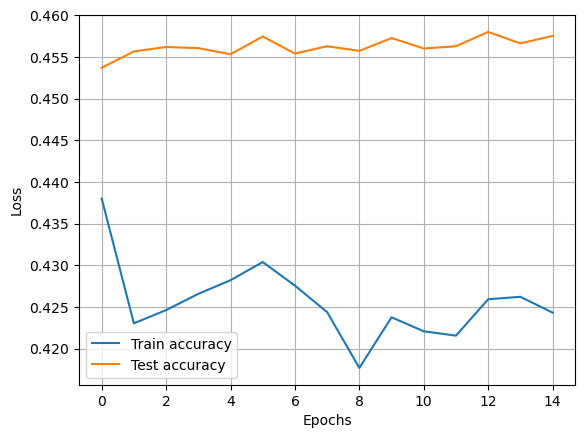

In [636]:
plt.plot(history.history['loss'],label='Train accuracy')
plt.plot(history.history['val_loss'],label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [637]:
y_pred = model.predict(X_test)
# Convert to class labels (0 or 1)
y_pred = (y_pred > 0.5).astype("int32")

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D6B38289A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [638]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the model is : ",accuracy)

Accuracy of the model is :  0.8116883116883117


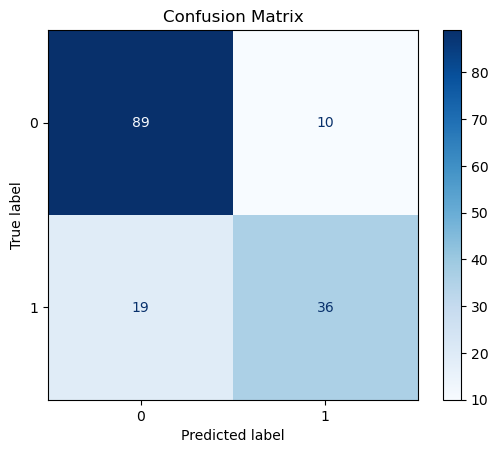

In [639]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Done